## Imports

In [ ]:
import itertools

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

## Load Data

In [ ]:
hitters_df = pd.read_csv('Hitters.csv')
hitters_df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [ ]:
hitters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [ ]:
hitters_df.isna().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [ ]:
hitters_df = hitters_df.dropna()

In [ ]:
quantitative_cols = hitters_df.select_dtypes(include=['number']).dtypes.index.tolist()
quantitative_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [ ]:
qualitative_cols = hitters_df.select_dtypes(include=['category', 'object']).dtypes.index.tolist()
qualitative_cols

['League', 'Division', 'NewLeague']

## Best Subset Selection

In [ ]:
response = 'Salary'
predictors = list(set(quantitative_cols) - set([response]))

In [ ]:
X_combos = itertools.combinations(predictors, 2)

models = []

for combo in X_combos:
    features = list(combo)
    X, y = hitters_df[features], hitters_df[response]
    model = LinearRegression()
    model.fit(X, y)
    y_hat = model.predict(X)
    # number of rows
    n = X.shape[0]
    # number of columns
    k = len(model.coef_)
    # degrees of freedom
    dof = n - (k + 1)
    # rss
    rss = np.power(y - y_hat, 2).sum()
    # tss
    tss = np.power(y - y.mean(), 2).sum()
    # adjusterd R^2
    adj_r_2 = 1 - (rss/tss)*(n-1)/dof
    models.append((features, adj_r_2))



In [ ]:
len(models)

120

In [ ]:
models

[(['CHits', 'PutOuts'], 0.3662188581432634),
 (['CHits', 'Errors'], 0.29696020482379704),
 (['CHits', 'RBI'], 0.38800746930943986),
 (['CHits', 'HmRun'], 0.3488304175168725),
 (['CHits', 'Assists'], 0.2970015833939965),
 (['CHits', 'CRuns'], 0.3121937518348886),
 (['CHits', 'CHmRun'], 0.3188556322019439),
 (['CHits', 'Years'], 0.340090663404115),
 (['CHits', 'CWalks'], 0.2959310361762484),
 (['CHits', 'CRBI'], 0.31765678412934917),
 (['CHits', 'Hits'], 0.39802730079060555),
 (['CHits', 'CAtBat'], 0.33704828388740515),
 (['CHits', 'Runs'], 0.3996074675257746),
 (['CHits', 'Walks'], 0.39070561041451624),
 (['CHits', 'AtBat'], 0.37393737626461976),
 (['PutOuts', 'Errors'], 0.0840868251996304),
 (['PutOuts', 'RBI'], 0.2245323951507574),
 (['PutOuts', 'HmRun'], 0.16031647350050737),
 (['PutOuts', 'Assists'], 0.08478511330087701),
 (['PutOuts', 'CRuns'], 0.38356443500640536),
 (['PutOuts', 'CHmRun'], 0.33414637935159375),
 (['PutOuts', 'Years'], 0.25001207191416686),
 (['PutOuts', 'CWalks'],

In [ ]:
['CRuns', 'HmRun'], 0.3535358209851682

(['CRuns', 'HmRun'], 0.3535358209851682)

In [ ]:
models = sorted(models, reverse=True, key=lambda t: t[1])

In [ ]:
models[0]

(['CRBI', 'Hits'], 0.4208023906703695)

In [ ]:
def list_models(df, k):
    models = []
    y = df[response]
    X_combos = itertools.combinations(list(predictors), k)
    for combo in X_combos:
        features = list(combo)
        X = df[features]
        model = LinearRegression()
        model.fit(X, y)
        y_hat = model.predict(X)
        # number of rows
        n = X.shape[0]
        # number of columns
        k = len(model.coef_)
        # degrees of freedom
        dof = n - (k + 1)
        # rss
        rss = np.power(y - y_hat, 2).sum()
        # tss
        tss = np.power(y - y.mean(), 2).sum()
        # adjusterd R^2
        adj_r_2 = 1 - (rss/tss)*(n-1)/dof
        models.append((features, adj_r_2))
    return models

In [ ]:
all_models = []
for k in range(1, len(predictors)+1):
    print(f'Progess: k = {k} started')
    models = list_models(hitters_df,  k)
    all_models.extend(models)
    print(f'Progess: k = {k} finished')

all_models = sorted(all_models, reverse=True, key=lambda tup: tup[1])

Progess: k = 1 started
Progess: k = 1 finished
Progess: k = 2 started
Progess: k = 2 finished
Progess: k = 3 started
Progess: k = 3 finished
Progess: k = 4 started
Progess: k = 4 finished
Progess: k = 5 started
Progess: k = 5 finished
Progess: k = 6 started
Progess: k = 6 finished
Progess: k = 7 started
Progess: k = 7 finished
Progess: k = 8 started
Progess: k = 8 finished
Progess: k = 9 started
Progess: k = 9 finished
Progess: k = 10 started
Progess: k = 10 finished
Progess: k = 11 started
Progess: k = 11 finished
Progess: k = 12 started
Progess: k = 12 finished
Progess: k = 13 started
Progess: k = 13 finished
Progess: k = 14 started
Progess: k = 14 finished
Progess: k = 15 started
Progess: k = 15 finished
Progess: k = 16 started
Progess: k = 16 finished


In [ ]:
all_models[0]

(['PutOuts',
  'Assists',
  'CRuns',
  'CWalks',
  'CRBI',
  'Hits',
  'CAtBat',
  'Walks',
  'AtBat'],
 0.5086408324706606)

## Forward Selection

In [ ]:
unused_features = predictors[:]
used_features = []
errors = []
model_stats = []

while unused_features:
    current_models = []
    for feature in unused_features:
        current_features = used_features + [feature]
        X = hitters_df[current_features]
        model = LinearRegression()
        model.fit(X, y)
        y_hat = model.predict(X)
        # number of rows
        n = X.shape[0]
        # number of columns
        k = len(model.coef_)
        # degrees of freedom
        dof = n - (k + 1)
        # rss
        rss = np.power(y - y_hat, 2).sum()
        # tss
        tss = np.power(y - y.mean(), 2).sum()
        # adjusterd R^2
        adj_r_2 = 1 - (rss/tss)*(n-1)/dof
        current_models.append((feature, adj_r_2))
    # sorted
    current_models = sorted(current_models, reverse=True, key=lambda tup: tup[1])
    best_model = current_models[0][0]
    best_error = current_models[0][1]
#     print(best_model)
#     break
    unused_features.remove(best_model)
    used_features.append(best_model)
    errors.append(best_error)
#     print(f'unused: {unused_features}, used: {used_features}')
    model_stats.append((len(used_features), used_features[:], best_error))
    print(used_features)
        
        


['CRBI']
['CRBI', 'Hits']
['CRBI', 'Hits', 'PutOuts']
['CRBI', 'Hits', 'PutOuts', 'AtBat']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks', 'CRuns']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks', 'CRuns', 'CAtBat']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks', 'CRuns', 'CAtBat', 'Assists']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks', 'CRuns', 'CAtBat', 'Assists', 'Runs']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks', 'CRuns', 'CAtBat', 'Assists', 'Runs', 'Errors']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks', 'CRuns', 'CAtBat', 'Assists', 'Runs', 'Errors', 'HmRun']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks', 'CRuns', 'CAtBat', 'Assists', 'Runs', 'Errors', 'HmRun', 'CHits']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks', 'CRuns', 'CAtBat', 'Assists', 'Runs', 'Errors', 'HmRun', 'CHits', 'Years']
['CRBI', 'Hits', 

In [ ]:
stats_df = pd.DataFrame(model_stats, columns=['cnt', 'columns', 'adj_r_2'])
stats_df

,cnt,columns,adj_r_2
0,1,[CRBI],0.318850
1,2,"[CRBI, Hits]",0.420802
2,3,"[CRBI, Hits, PutOuts]",0.445075
3,4,"[CRBI, Hits, PutOuts, AtBat]",0.462159
4,5,"[CRBI, Hits, PutOuts, AtBat, Walks]",0.480505
5,6,"[CRBI, Hits, PutOuts, AtBat, Walks, CWalks]",0.481896
6,7,"[CRBI, Hits, PutOuts, AtBat, Walks, CWalks, CR...",0.496239
7,8,"[CRBI, Hits, PutOuts, AtBat, Walks, CWalks, CR...",0.503651
8,9,"[CRBI, Hits, PutOuts, AtBat, Walks, CWalks, CR...",0.508641
9,10,"[CRBI, Hits, PutOuts, AtBat, Walks, CWalks, CR...",0.507753


In [ ]:
best_idx = stats_df['adj_r_2'].idxmax()
best_idx

8

In [ ]:
stats_df.loc[best_idx, 'cnt'], stats_df.loc[best_idx, 'adj_r_2']

(9, 0.5086408324706606)

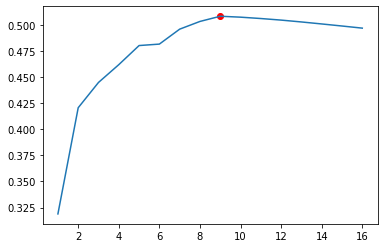

In [ ]:
plt.plot(stats_df['cnt'], stats_df['adj_r_2'])
plt.scatter(x=stats_df.loc[best_idx, 'cnt'], y=stats_df.loc[best_idx, 'adj_r_2'], c='r')
plt.show()

## Backward Selection